In [62]:
# importando as bibliotecas
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st

In [5]:
# carregando os arquivos e gerando os dataframes
trips_amount = pd.read_csv('/datasets/project_sql_result_01.csv')
neighborhoods = pd.read_csv('/datasets/project_sql_result_04.csv')

In [24]:
# visualizando os dados de trips_amount
trips_amount.sample(10)

# trips_amount: o número de corridas para cada empresa de táxi de 15 a 16 de novembro de 2017.

,company_name,trips_amount
58,5062 - 34841 Sam Mestas,8
61,5874 - 73628 Sergey Cab Corp.,5
32,Leonard Cab Co,147
38,6743 - 78771 Luhak Corp,33
3,Yellow Cab,9888
31,American United Taxi Affiliation,210
16,Blue Diamond,2070
54,2192 - 73487 Zeymane Corp,14
62,2241 - 44667 - Felman Corp,3
14,Patriot Taxi Dba Peace Taxi Association,2235


In [12]:
# visualizando os tipos de dados
trips_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


Conclusion: Data types are correct, but company_name should be a string (object) and trips_amount should be an integer (int).

In [8]:
# visualizando os dados de neighborhoods
neighborhoods.sample(10)

# dropoff_location_name: bairros de Chicago onde as corridas terminaram
# average_trips: o número médio de viagens que terminaram em cada bairro em novembro de 2017.

,dropoff_location_name,average_trips
36,Kenwood,89.366667
8,Gold Coast,1364.233333
65,Ashburn,16.133333
83,Avalon Park,6.966667
43,Mckinley Park,64.033333
59,Chatham,23.200000
71,Edison Park,14.166667
31,Lower West Side,143.300000
0,Loop,10727.466667
56,Ukrainian Village,27.600000


In [13]:
# visualizando os tipos de dados
neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [15]:
# verificando se haverá perda de dados ao converter average_trips para int
np.array_equal(neighborhoods['average_trips'], neighborhoods['average_trips'].astype('int'))

False

Conclusion: There will be differences if we convert average_trips to an integer; we need to round it first.

In [16]:
# arredondando average_trips para zero casas decimais
neighborhoods['average_trips'] = neighborhoods['average_trips'].round(0)

# verificando novamente se haverá perda de dados ao converter average_trips para int após arredondamento
np.array_equal(neighborhoods['average_trips'], neighborhoods['average_trips'].astype('int'))


True

Conclusion: Now we can convert to integer without differences

In [17]:
# convertendo average_trips para int
neighborhoods["average_trips"] = neighborhoods["average_trips"].astype(int)
neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [18]:
neighborhoods.sample(10)

,dropoff_location_name,average_trips
65,Ashburn,16
58,Englewood,25
83,Avalon Park,7
91,Burnside,2
88,Undef,4
10,Lincoln Park,1247
22,Lincoln Square,357
42,Garfield Park,66
37,Bridgeport,77
0,Loop,10727


In [19]:
# verificando os top10 bairros em termos de destinos
sorted_neighborhoods = neighborhoods.sort_values(by="average_trips", ascending=False)
sorted_neighborhoods.head(10)

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
5,Lake View,2421
6,Grant Park,2069
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1260


In [28]:
# fazer gráficos: empresas de táxi e número de corridas

# preparando os dados para criar o primeiro gráfico
sorted_trips = trips_amount.sort_values(by="trips_amount", ascending=False)
sorted_trips.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


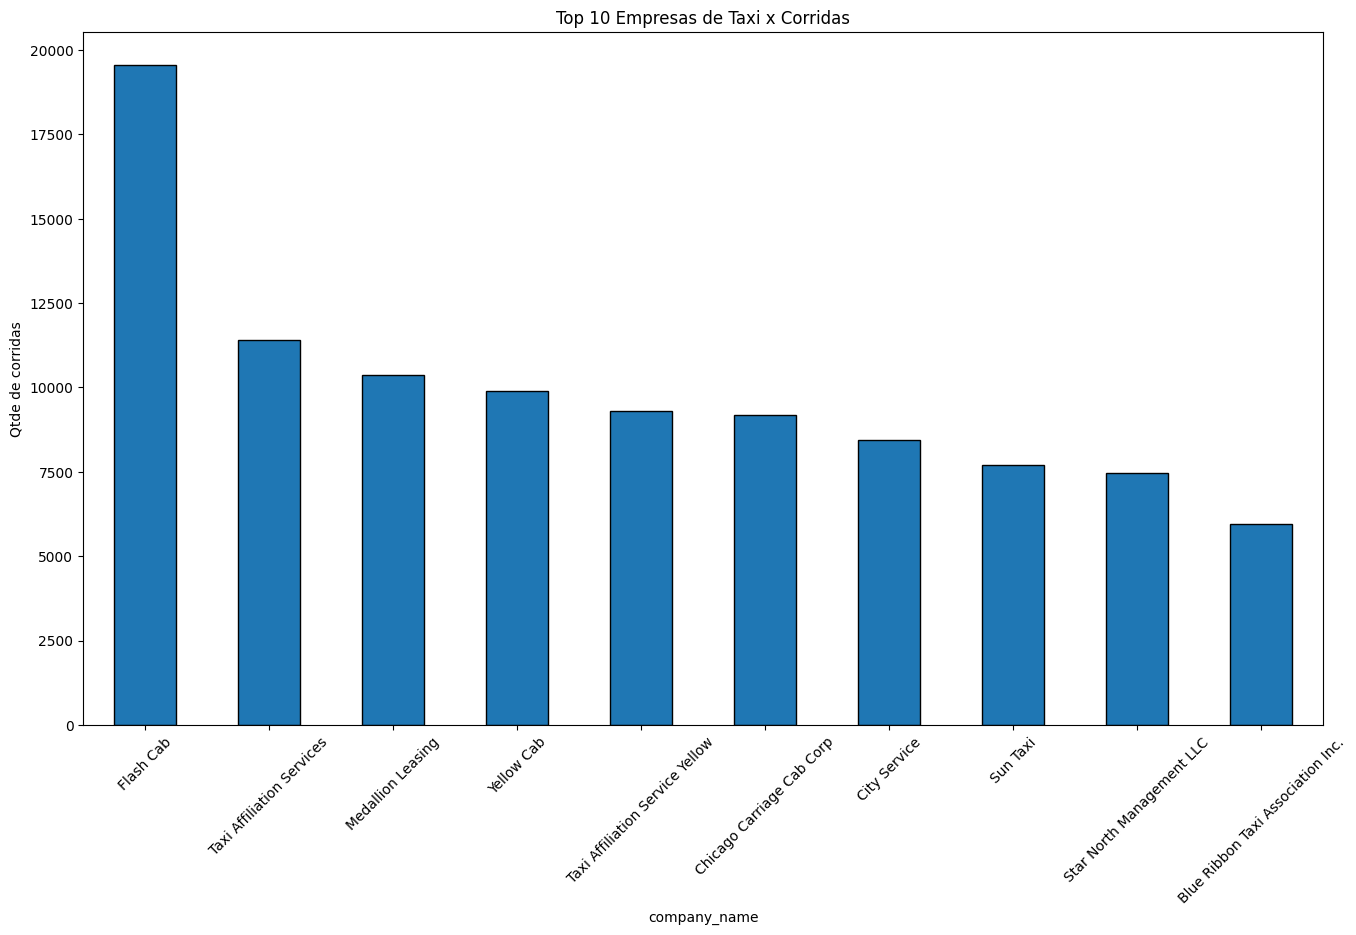

In [46]:
# plotando gráfico para empresas de taxi e número de corridas
sorted_trips.head(10).plot(
    kind="bar",
    x="company_name",
    y="trips_amount",
    ylabel="Qtde de corridas",
    edgecolor="black",
    title="Top 10 Empresas de Taxi x Corridas",
    figsize=[16,9],
    legend=False,
    rot=45
)
plt.show()

Conclusion: The top 10 taxi companies are listed above, with Flash Cab making significantly more trips than the others.

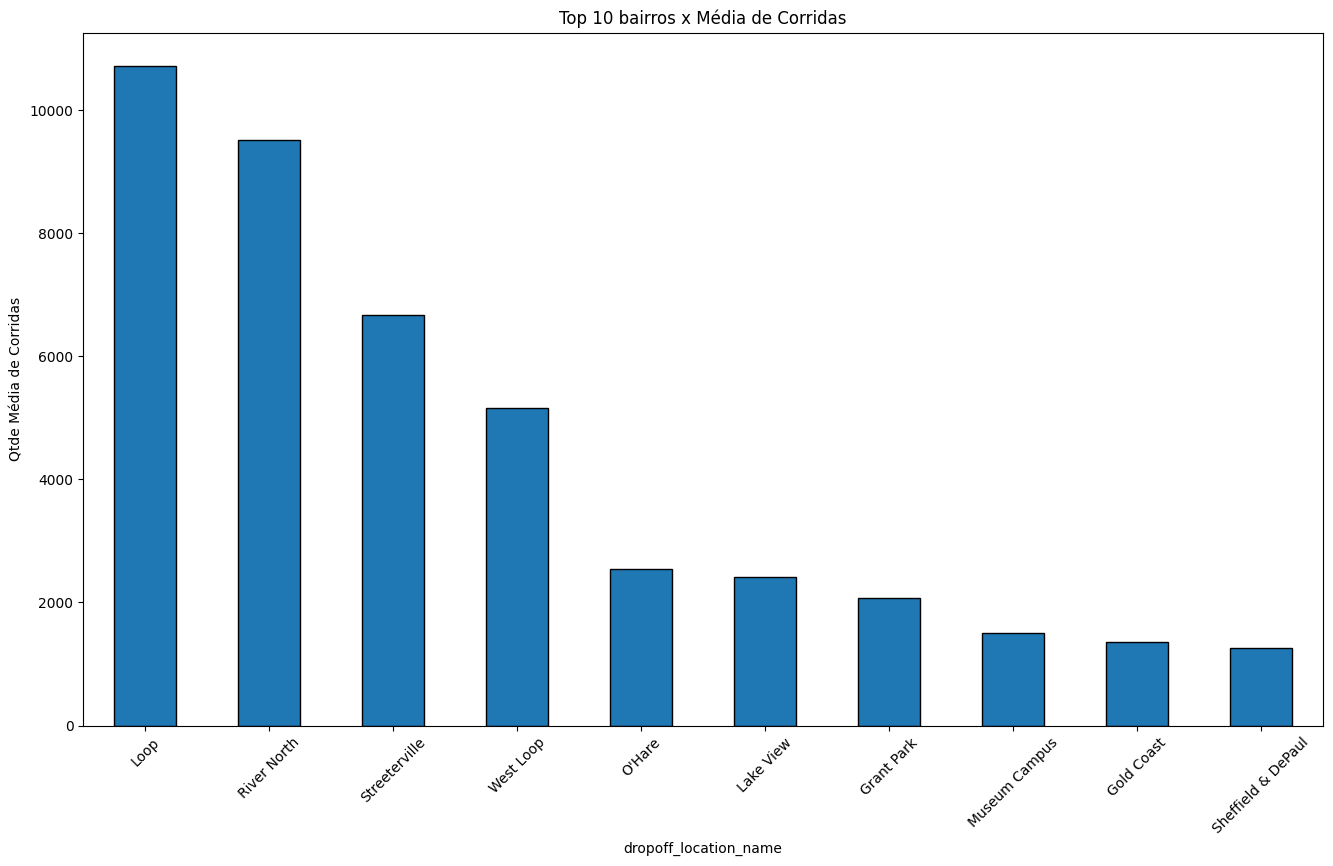

In [47]:
# plotando gráfico dos top 10 bairros de destino
sorted_neighborhoods.head(10).plot(
    kind="bar",
    x="dropoff_location_name",
    y="average_trips",
    ylabel="Qtde Média de Corridas",
    edgecolor="black",
    title="Top 10 bairros x Média de Corridas",
    figsize=[16,9],
    legend=False,
    rot=45
)
plt.show()

Conclusion: We observe a higher average number of trips in the Loop and River North neighborhoods, followed by Streeterville and West Loop.

General Conclusion So Far

- Flash Cab generated the highest number of trips, almost double that of the second company with the most trips (Taxi Affiliation Services).
The average number of trips by drop-off neighborhood is concentrated mainly in Loop and River North.

In [51]:
# Passo 5. Testando hipóteses (Python)
# carregando novos dados

loop_ohare = pd.read_csv("/datasets/project_sql_result_07.csv")

In [49]:
#visualizando os dados
loop_ohare.sample(10)

,start_ts,weather_conditions,duration_seconds
198,2017-11-11 14:00:00,Good,2225.0
280,2017-11-25 06:00:00,Good,2842.0
291,2017-11-11 07:00:00,Good,1440.0
522,2017-11-25 09:00:00,Good,1513.0
1043,2017-11-04 11:00:00,Good,2693.0
883,2017-11-04 08:00:00,Good,1690.0
740,2017-11-11 16:00:00,Good,2220.0
945,2017-11-04 15:00:00,Good,3699.0
1034,2017-11-11 10:00:00,Good,1500.0
982,2017-11-11 15:00:00,Good,2220.0


In [50]:
# visualizando os tipos de dados
loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Conclusão: start_ts could be converted to datetime but it's not necessary fdor this project, other data is ok

In [60]:
# Teste a hipótese: "A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos." 

# H0 - A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare NÃO muda nos sábados chuvosos
# H1 - A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos

# preparando as amostras

sample1 = loop_ohare[loop_ohare["weather_conditions"] == "Good"]["duration_seconds"]
sample2 = loop_ohare[loop_ohare["weather_conditions"] == "Bad"]["duration_seconds"]

alpha = .05

# avaliando a variancia das duas amostras para decidir equal_var True ou False
print("var sample 1:", np.var(sample1))
print("var sample 2:", np.var(sample2))

var sample 1: 575732.9308497686
var sample 2: 517403.56330246915


Sample 1 and 2 variances are not equal, therefore we set equal_var=False for the hypothesis test

In [63]:
# usando ttest_ind pois estamos comparando médias de duas populações
# usando equal_var=False pois as amostras tem variancias diferentes

results = st.ttest_ind(
    sample1,
    sample2,
    equal_var=False
)

print('valor-p:', results.pvalue)

if (results.pvalue < alpha):
    print("Reject null hypothesis, therefore average trip duration from Loop to O'Hare changes on rainy saturdays")
else:
    print("Can't reject null hypothesis, therefore average trip duration from Loop to O'Hare DOES NOT change on rainy saturdays")

valor-p: 6.738994326108734e-12
Rejeitamos a hipótese nula - portanto, a duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos
